Chapter 11

# 支持向量机，线性核
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm

In [2]:
# Create 20 points 
X = np.array([[0,2],[2,0],[4.5,0],[4.5,3],[3,4.5],
              [2,1],[1.5,3],[4,4],[0,3.5],[3,2.5],
              [-1,-1],[-3,-4.5],[-2,-3],[-4,-4],[0,-2.5],
              [-1,-3.5],[-3.5,-1],[0,-3.5],[-3,-1],[-4,0]])
y = [1] * 10 + [-1] * 10

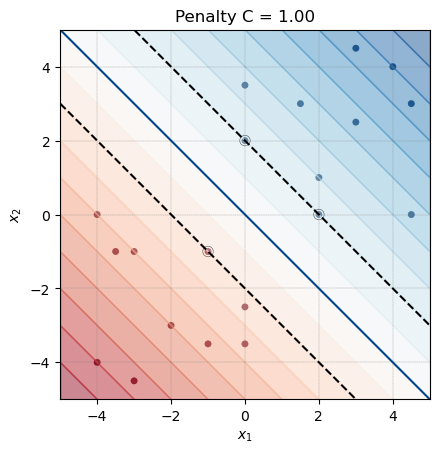

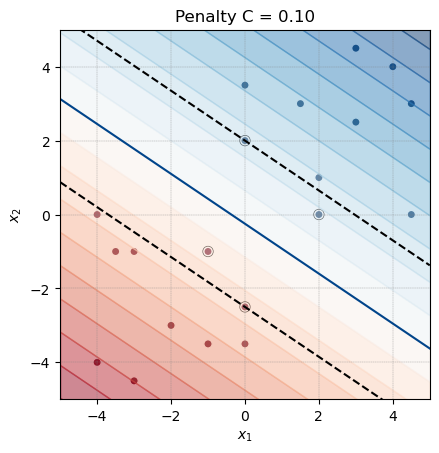

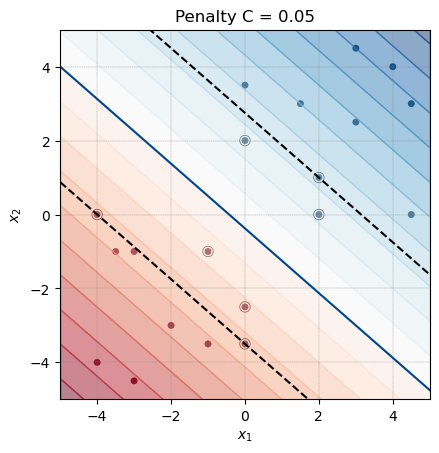

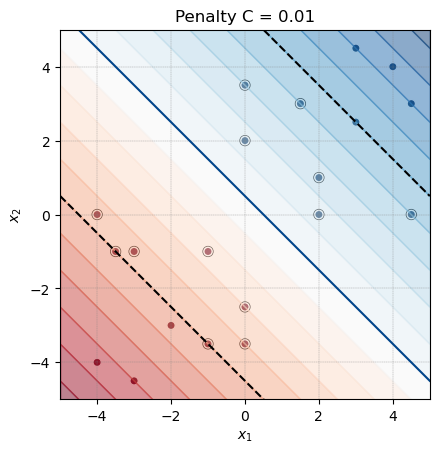

In [3]:
for penalty in (1,0.1,0.05,0.01):

    clf = svm.SVC(kernel='linear', C=penalty)
    
    # load data and fit the model
    clf.fit(X, y)

    # extract parameters of the decision boundary
    w = clf.coef_[0]
    w1 = w[0]
    w2 = w[1]

    b  = clf.intercept_[0]
    x1_vec = np.linspace(-5, 5)

    # decision boundary
    x2_decision = -w1/w2*x1_vec - b/w2

    # upper boundary of margin
    x2_up   = -w1/w2*x1_vec - (b - 1)/w2
    
    # lower boundary of margin
    x2_down = -w1/w2*x1_vec - (b + 1)/w2

    # visualization
    
    fig, ax = plt.subplots()
    plt.plot(x1_vec, x2_decision, color=np.array([0, 68, 138])/255.)
    plt.plot(x1_vec, x2_down, 'k--')
    plt.plot(x1_vec, x2_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50,
                facecolors='none', edgecolors='k')

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.get_cmap('RdBu'),
                edgecolors='w')

    x_1_2_min = -5
    x_1_2_max = 5

    YY, XX = np.meshgrid(x1_vec,x1_vec)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    cnt = plt.contourf(XX, YY, Z, levels = 20, cmap=cm.get_cmap('RdBu'),
                       alpha=0.5, linestyles=None)
    for c in cnt.collections:
        c.set_edgecolor("face")
        
    plt.axis('scaled')

    ax.set_xlim(x_1_2_min, x_1_2_max)
    ax.set_ylim(x_1_2_min, x_1_2_max)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    plt.xticks(np.arange(x_1_2_min+1, x_1_2_max+1, 2))
    plt.yticks(np.arange(x_1_2_min+1, x_1_2_max+1, 2))
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
    plt.title("Penalty C = {:.2f}".format(penalty))

plt.show()